In [144]:
import json
from wordcloud import WordCloud

In [3]:
with open('../data/processed/wea_freq_counts.json', 'r', encoding='utf8') as f:
    common_wea = json.load(f)

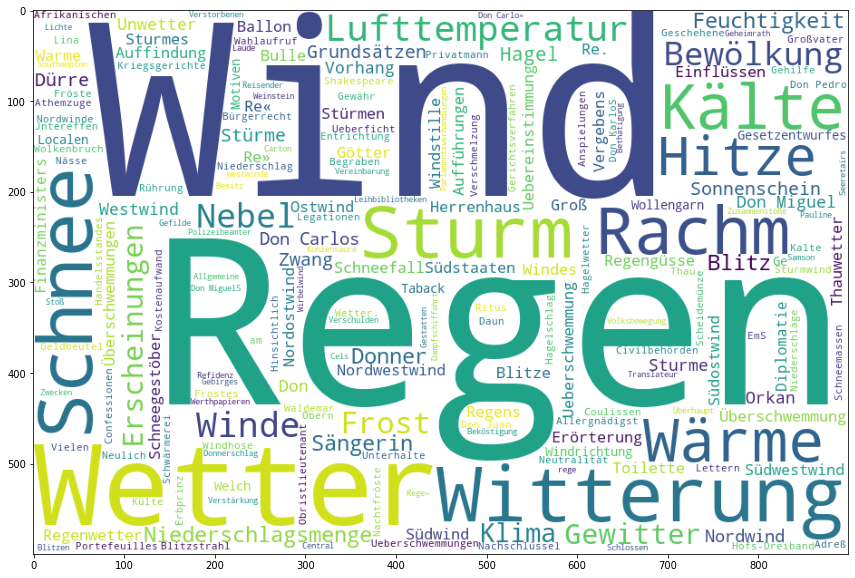

In [6]:
common_wea_dict = {entity: freq for (entity, freq) in common_wea}

wc = WordCloud(background_color='white', width=900, height=600)
wc.generate_from_frequencies(common_wea_dict)
plt.figure(figsize=(15,10))
plt.imshow(wc)
plt.show()

## PCA

In [111]:
import gensim
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn import preprocessing

In [112]:
model = gensim.models.keyedvectors.KeyedVectors.load_word2vec_format('../data/models/word2vec_251021/w2v_model.txt')

In [62]:
df_data = {word: list(model[word]) for (word, freq) in common_wea[:100] if model.has_index_for(word)}
df = pd.DataFrame(df_data).transpose()
df.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
Wind,3.997121,-1.997144,-0.896162,-1.015114,-0.644477,5.687706,-0.398044,-4.558488,-2.631009,0.409658,...,-2.136814,0.583438,3.231198,1.095965,-1.395962,1.187891,0.579628,2.233373,0.842518,1.585546
Regen,4.597841,-1.278705,-0.924405,-0.310730,4.019860,6.215589,0.146798,-1.136845,1.547163,-0.099335,...,-1.369600,-0.462511,1.295471,-0.558615,-2.030243,1.398353,-1.667691,-1.582838,-2.764452,-0.416062
Wetter,1.378204,-2.707503,-2.039176,1.217988,2.243737,7.249822,0.605895,-0.760818,1.997465,1.639767,...,-1.648705,0.733798,1.211946,4.739862,-3.160194,3.041113,-2.772848,-0.826249,0.374688,-1.111655
Witterung,-0.005538,-7.517947,-0.256603,-0.812336,3.149959,6.066840,-0.382613,-0.186831,2.737664,0.334570,...,-2.412435,-0.453090,0.055757,1.896720,-4.634286,2.564435,-0.422497,1.706759,-0.234471,0.613567
Schnee,3.939676,-1.105344,0.347245,-0.435409,3.114347,6.202371,-0.316959,-0.076473,0.962735,-2.151477,...,-2.628811,-0.392534,3.291287,-0.900989,-1.600252,-0.184403,-0.208574,-0.483410,-4.225474,-1.926019


In [63]:
# from: https://www.youtube.com/watch?v=Lsue2gEM9D0

pca = PCA()
pca.fit(df)
pca_data = pca.transform(df)

In [64]:
per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]

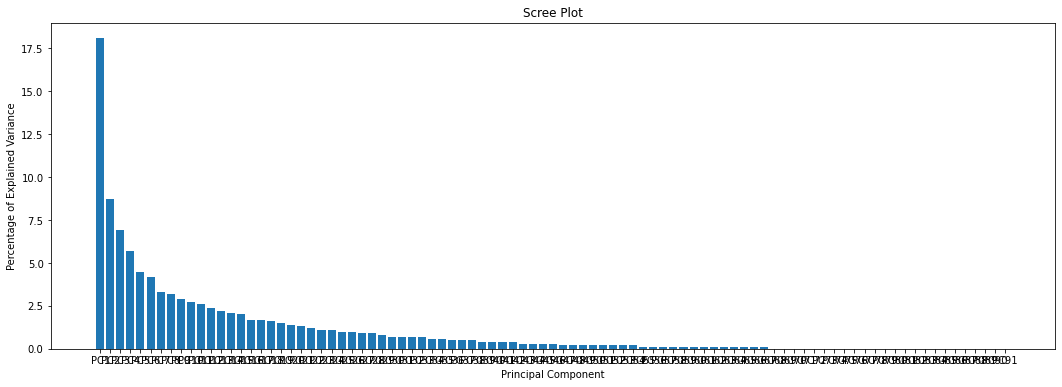

In [65]:
plt.figure(figsize=(18,6))
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

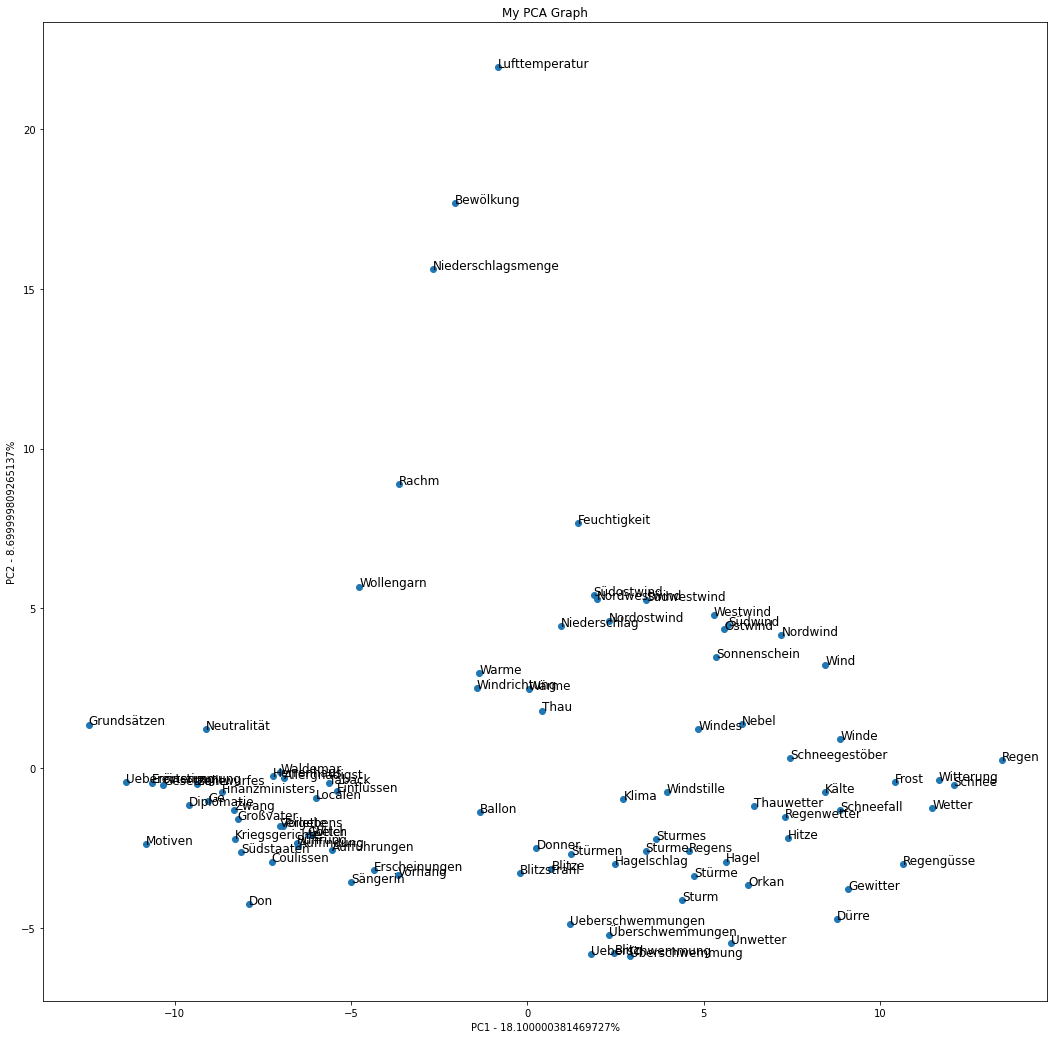

In [68]:
pca_df = pd.DataFrame(data=pca_data, index=df.index, columns=labels)

plt.figure(figsize=(18,18))

plt.scatter(pca_df.PC1, pca_df.PC2)
plt.title('My PCA Graph')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))
 
for sample in pca_df.index:
    plt.annotate(sample, (pca_df.PC1.loc[sample], pca_df.PC2.loc[sample]), size=12)
    
plt.show()

## Check if similar vectors are captured

In [77]:
def check_similar_vectors_presence(common_wea, model, top_n):

    results = {}
    entities = [word for (word,freq) in common_wea]
    
    for word in entities:
        if model.has_index_for(word):
            results[word] = [similar[0] for similar in model.most_similar(word, topn=top_n)
                             if similar[0] in entities]
        
    return results
    
check_similar_vectors_presence(common_wea[:1000], model, 20)

{'Wind': ['Winde',
  'Windes',
  'Regen',
  'Nordwind',
  'Nordostwinde',
  'Nordwinde',
  'WindeS',
  'Westwinde'],
 'Regen': ['Schnee',
  'Regenwetter',
  'Schneegestöber',
  'Frost',
  'Schnee-',
  'Regengüsse',
  'Gewitter',
  'Nachtfröste'],
 'Wetter': ['Witterung', 'Regenwetter', 'Winde', 'Regen'],
 'Witterung': ['Wetter', 'Regenwetter', 'Nachtfröste', 'Regen', 'Nordwinde'],
 'Schnee': ['Regen',
  'Schnee-',
  'Schneegestöber',
  'Frost',
  'Schneefall',
  'Schneemassen',
  'Regenwetter',
  'Nebel',
  'Thauwetter'],
 'Sturm': ['Sturme',
  'Orkan',
  'Sturmes',
  'Sturmwind',
  'Stürme',
  'Wirbelwind',
  'Sturms',
  'Stürmen'],
 'Rachm': [],
 'Kälte': ['Kalte',
  'Frost',
  'Hitze',
  'Külte',
  'Fröste',
  'Regenwetter',
  'Thauwetter',
  'Nachtfröste',
  'Schneefall',
  'Froste',
  'Nordwinde',
  'Schneegestöber'],
 'Wärme': ['Warme', 'Kälte'],
 'Hitze': ['Kälte',
  'Kalte',
  'Trockenheit',
  'Frost',
  'Külte',
  'Regenwetter',
  'Nässe',
  'Dürre',
  'Regen',
  'Regengüsse',

In [123]:
model.most_similar('Witterung', topn=50)

[('Wetter', 0.8168214559555054),
 ('anhaltend', 0.801862895488739),
 ('Regenwetter', 0.7430318593978882),
 ('Jahreszeit', 0.7418050169944763),
 ('Witternng', 0.7346042394638062),
 ('Wetters', 0.7110077738761902),
 ('Witteruug', 0.7066730260848999),
 ('regnerische', 0.7055101990699768),
 ('regnerisch', 0.6943164467811584),
 ('Nachtfröste', 0.6914159655570984),
 ('Witterungsverhältnisse', 0.6895604133605957),
 ('Herbstwetter', 0.6888090372085571),
 ('Welter', 0.6834408044815063),
 ('Regen', 0.6744284629821777),
 ('Nordwinde', 0.6742110848426819),
 ('Winterbahn', 0.6711713075637817),
 ('Schlittenbahn', 0.6669121384620667),
 ('Südwinde', 0.6564524173736572),
 ('Regenschauern', 0.6558184623718262),
 ('WetterS', 0.6468559503555298),
 ('Frühlingswetter', 0.6458560824394226),
 ('Gewitterregen', 0.6435000896453857),
 ('unbeständige', 0.6406728625297546),
 ('Witterungswechsel', 0.6388669013977051),
 ('Frost', 0.6368117332458496),
 ('Herbstwitterung', 0.63592928647995),
 ('Thauwetter', 0.63478380

In [124]:
regen_list = ['Regen', 'regen', 'Regenwetter', 'Negen', 'Regenschauer', 'Strichregen', 'Platzregen', 'Rege',
             'Regengüssen', 'Regens', 'RegenS', 'Regeu', 'Regenfall']

wetter_list = ['Welter', 'Witterung', 'Werter', 'Wetters', 'Witteruug', 'Witternng', 'WetterS']

## Adjectives

In [75]:
import pandas as pd
from climdist.data import load as cd_load
import spacy
import json
from tqdm import tqdm

In [2]:
df = cd_load('main', readability=True, heading2=False)

In [4]:
with open('../data/processed/entities.json', 'r', encoding='utf8') as f:
    ents = json.load(f)

In [78]:
nlp = spacy.load('de_core_news_md', disable=['ner'])

In [117]:
def find_adjectives(df, ents, nlp, label, ent_name, ent_strings):
    
    results = []
    
    for entry in tqdm(ents):
        if len(entry['ents'][label]) > 0:
            
            entry_ents = entry['ents'][label]
            entry_id = entry['id']
            #print(entry_id)
            
            # check if any of the ent labels are the ones we are looking for
            if set([ent[0] for ent in entry_ents]).intersection(ent_strings):
                    
                patterns = []
                                    
                for ent in entry_ents:
                    if ent[0] in ent_strings:
                        patterns.append({'label': 'WEA', 'pattern': ent[0]})
                                
                nlp.add_pipe('entity_ruler', last=True)
                ruler = nlp.get_pipe('entity_ruler')
                ruler.add_patterns(patterns)
                
                doc = nlp(df.full_text[entry_id])
                adjectives = []
                
                for token in doc:
                    if token.ent_type_ == label:
                        if token.pos_ in ['NOUN', 'PROPN']:
                            adjectives.extend([child.lemma_ for child in token.children if child.pos_ == 'ADJ'])
                            
                results.extend(adjectives)
                nlp.remove_pipe('entity_ruler')
                
                
            else:
                pass
             
        else:
            pass
        
        
    return {ent_name: results}            

In [110]:
list1 = [1,2,3]
list2 = [3,4,5]

if set(list1).intersection(set(list2)):
    print('y')

y


In [129]:
if 'entity_ruler' in nlp.pipe_names:
    nlp.remove_pipe('entity_ruler')

regen_adjs = find_adjectives(df, ents, nlp, 'WEA', 'Regen', regen_list)
wetter_adjs = find_adjectives(df, ents, nlp, 'WEA', 'Wetter', wetter_list)

100%|█████████████████████████████████████████████████████████████████████████| 256996/256996 [24:35<00:00, 174.17it/s]


In [133]:
with open('../pipeline/ner/regen_adjectives.json', 'w', encoding='utf8') as f:
    json.dump(regen_adjs, f)
    
with open('../pipeline/ner/wetter_adjectives.json', 'w', encoding='utf8') as f:
    json.dump(wetter_adjs, f)

In [140]:
df_regen = pd.DataFrame(data=regen_adjs)
df_wetter = pd.DataFrame(data=wetter_adjs)

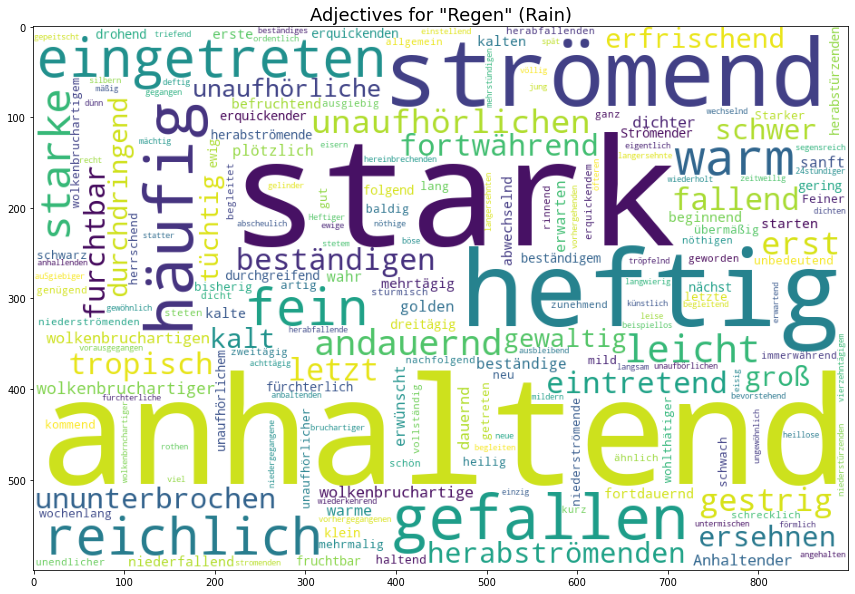

In [146]:
wc = WordCloud(background_color='white', width=900, height=600)
wc.generate_from_frequencies(df_regen['Regen'].value_counts().to_dict())
plt.figure(figsize=(15,10))
plt.imshow(wc)
plt.title('Adjectives for "Regen" (Rain)', size=18)
plt.show()

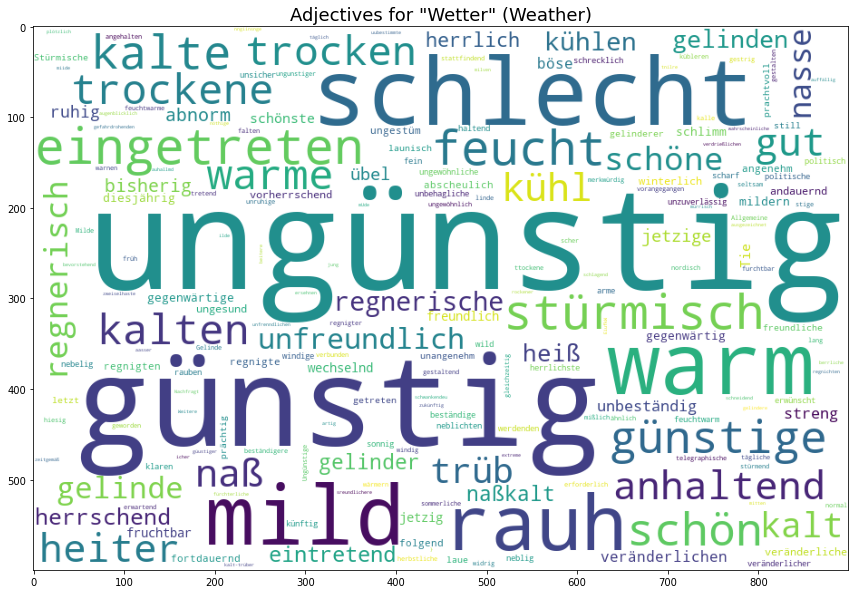

In [147]:
wc = WordCloud(background_color='white', width=900, height=600)
wc.generate_from_frequencies(df_wetter['Wetter'].value_counts().to_dict())
plt.figure(figsize=(15,10))
plt.imshow(wc)
plt.title('Adjectives for "Wetter" (Weather)', size=18)
plt.show()

In [143]:
df_wetter['Wetter'].value_counts()[0:50]

ungünstig         405
günstig           316
schlecht          149
warm              129
mild              118
rauh               99
eingetreten        87
feucht             80
stürmisch          79
kalte              74
günstige           71
schön              70
warme              58
kalten             57
trockene           56
trocken            54
gut                50
anhaltend          49
heiter             48
kühl               46
naß                45
trüb               39
kalt               38
schöne             35
regnerisch         35
nasse              32
gelinde            30
unfreundlich       28
regnerische        27
kühlen             26
gelinden           25
heiß               24
herrschend         23
eintretend         21
gelinder           19
naßkalt            19
herrlich           17
bisherig           14
abnorm             14
übel               13
jetzige            13
ruhig              12
streng             11
unbeständig        11
veränderlichen     10
böse      

In [62]:
somelist.extend([5,6])

In [63]:
somelist

[1, 2, 3, 4, 5, 6]

In [28]:
test_ent = doc.ents[0]

In [43]:
for token in doc:
    if token.ent_type_:
        print(token, token.)

Stolzenberg
Danzig
Wonneberg
KaiserNch-Russischen
Belagerung
im
Jahr
1807
»
ar
dort
luim
»
iich
Schulz
sifcher
WirlhSleute
h-tle
Russische
Л.
Friede
WirthSleute
pafsiren
Einquartierte
Woimeburger
Dorfschaft
Kaiserlichen
Gar
Mann
ho
Hauses
aIS
Einquartierte
auS
Cb
I.
Bihin
Mailand
Genua
Turin
RenneS
James
vvn
aIS
SO
Fuß
Verzweifelnd
rieth
eS
Gal
ln
Berlin
bie
FleischstückchenS
Dcctvr
BarrieS
Berlin
Otze
ird
leck
Entzücken
Schweizer
Z
Gessenep
Canrvn
Bern
leibn
ben
Eie
bern
idn
llebriaen
Zeit
fie
B-ttt
fru
»
M
it
lcichtn
Mühe
bSeee
ngendltt
wölkte
Ы
Mabcha
ШйЬт
®
unb
lr-nch
Vorderste
teägt
&
lt;iwn
Hand
S
MennthierS
WJJ
Zeit
Zeil
ben
W
Itgee
jedeS
Jiger
Der
Hinmm
&
gt
London
Themse
lei
Mann
uthele
Alte
N
Derzweifiung
Werther
Ge-Nlilin
Napoleons
Gottes
Ra


In [30]:
ent_token = doc[test_ent.start:test_ent.end]

In [44]:
doc = nlp('Es gab ein kleiner Sturm.')

In [59]:
[(child, child.pos_) for child in doc[4].children]

[(ein, 'DET'), (kleiner, 'ADJ')]